# Business Understanding

Climate Change (perubahan iklim) merupakan isu global yang sudah lama menjadi pekerjaan rumah bagi pemerintah dunia. Sejak pertengahan abad 20, emisi greenhouse gas atau gas rumah oleh aktivitas manusia menjadi penyebab utama perubahan iklim. Hal tersebut berarti juga tidak ada solusi sederhana untuk mengatasi perubahan iklim, untuk membuat progress dalam mengurangi GHG emisi, ada 2 area yang perlu diperhatikan yaitu energi dan makanan/agrukultur. Oleh karena itu, pada Challenge ke-3, penulis akan melakukan analisis terkait hubungan kenaikan temperatur bumi dengan tingkat emisi greenhouse gas, selanjutnya mencari sektor penyumbang emisi gas tertinggi. Tujuan bisnis dari pembahasan kelompok kami adalah mengajak, menghimpun dan memberikan saran kepada sektor tersebut untuk memulai kegiatan yang ramah lingkungan.

# Pre-Processing

In [2]:
pip install pulp

     |████████████████████████████████| 40.6MB 92kB/s 


In [3]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [4]:
uploaded = files.upload()

Saving ghg-emissions-by-sector.csv to ghg-emissions-by-sector.csv


Menampilkan data yang digunakan

In [5]:
emisi =  pd.read_csv(io.BytesIO(uploaded['ghg-emissions-by-sector.csv']))
emisi

,Entity,Code,Year,"Agriculture (GHG Emissions, CAIT)","Bunker Fuels (GHG Emissions, CAIT)","Industry (GHG Emissions, CAIT)","Land-Use Change and Forestry (GHG Emissions, CAIT)","Waste (GHG Emissions, CAIT)","Buildings (GHG Emissions, CAIT)","Electricity & Heat (GHG Emissions, CAIT)","Fugitive from energy production (GHG Emissions, CAIT)","Manufacturing/Construction energy (GHG Emissions, CAIT)","Other Fuel Combustion (GHG Emissions, CAIT)","Transport (GHG Emissions, CAIT)"
0,Afghanistan,AFG,1990,8.09,NaN,0.05,0.00,1.23,NaN,NaN,0.61,NaN,2.63,NaN
1,Afghanistan,AFG,1991,8.41,NaN,0.05,0.00,1.32,NaN,NaN,0.52,NaN,2.40,NaN
2,Afghanistan,AFG,1992,8.42,NaN,0.06,0.00,1.40,NaN,NaN,0.22,NaN,2.18,NaN
3,Afghanistan,AFG,1993,8.50,NaN,0.06,0.00,1.49,NaN,NaN,0.16,NaN,1.95,NaN
4,Afghanistan,AFG,1994,8.54,NaN,0.07,0.00,1.58,NaN,NaN,0.12,NaN,1.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Zimbabwe,ZWE,2012,13.21,0.0,1.48,36.15,2.29,0.2,5.6,0.49,1.9,3.61,2.6
5261,Zimbabwe,ZWE,2013,12.57,0.0,1.43,36.11,2.34,0.1,6.8,0.55,1.0,3.65,2.9
5262,Zimbabwe,ZWE,2014,10.97,0.0,1.53,36.11,2.38,0.2,6.8,0.60,1.1,3.90,2.6
5263,Zimbabwe,ZWE,2015,11.52,0.1,1.58,36.25,2.43,0.2,7.2,0.66,1.1,3.95,2.5


Menghilangkan kolom yang tidak digunakan yaitu kolom Code, dan mereduce data yang digunakan untuk tahun 2000-2016

In [6]:
thn= [i for i in range(1990,2000)]
for i, val in enumerate(emisi['Year'].values):
    if val in thn:
        emisi.drop(index=i, axis=0, inplace=True,
    errors='ignore')
    else:
            continue

In [7]:
emisi = emisi.drop('Code',axis=1)
emisi

,Entity,Year,"Agriculture (GHG Emissions, CAIT)","Bunker Fuels (GHG Emissions, CAIT)","Industry (GHG Emissions, CAIT)","Land-Use Change and Forestry (GHG Emissions, CAIT)","Waste (GHG Emissions, CAIT)","Buildings (GHG Emissions, CAIT)","Electricity & Heat (GHG Emissions, CAIT)","Fugitive from energy production (GHG Emissions, CAIT)","Manufacturing/Construction energy (GHG Emissions, CAIT)","Other Fuel Combustion (GHG Emissions, CAIT)","Transport (GHG Emissions, CAIT)"
10,Afghanistan,2000,10.99,NaN,0.11,0.00,1.96,NaN,NaN,0.09,NaN,1.18,NaN
11,Afghanistan,2001,9.28,NaN,0.12,0.00,2.05,NaN,NaN,0.08,NaN,1.16,NaN
12,Afghanistan,2002,11.57,NaN,0.12,0.00,2.15,NaN,NaN,0.08,NaN,1.14,NaN
13,Afghanistan,2003,12.05,NaN,0.14,0.00,2.24,NaN,NaN,0.07,NaN,1.12,NaN
14,Afghanistan,2004,11.79,NaN,0.14,0.00,2.33,NaN,NaN,0.06,NaN,1.11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Zimbabwe,2012,13.21,0.0,1.48,36.15,2.29,0.2,5.6,0.49,1.9,3.61,2.6
5261,Zimbabwe,2013,12.57,0.0,1.43,36.11,2.34,0.1,6.8,0.55,1.0,3.65,2.9
5262,Zimbabwe,2014,10.97,0.0,1.53,36.11,2.38,0.2,6.8,0.60,1.1,3.90,2.6
5263,Zimbabwe,2015,11.52,0.1,1.58,36.25,2.43,0.2,7.2,0.66,1.1,3.95,2.5


Perhitungan statistika sederhana

In [8]:
# check for numbers
print(emisi.describe())
print("--------------------------------------")

              Year  ...  Transport (GHG Emissions, CAIT)
count  3315.000000  ...                      2363.000000
mean   2008.000000  ...                        95.038299
std       4.899719  ...                       594.549770
min    2000.000000  ...                         0.000000
25%    2004.000000  ...                         2.200000
50%    2008.000000  ...                         6.700000
75%    2012.000000  ...                        25.900000
max    2016.000000  ...                      7866.000000

[8 rows x 12 columns]
--------------------------------------


Melakukan pengecekan missing value

In [9]:
# Check for Nulls
print(emisi.isnull().any())
print("--------------------------------------")

Entity                                                     False
Year                                                       False
Agriculture (GHG Emissions, CAIT)                          False
Bunker Fuels (GHG Emissions, CAIT)                          True
Industry (GHG Emissions, CAIT)                              True
Land-Use Change and Forestry (GHG Emissions, CAIT)         False
Waste (GHG Emissions, CAIT)                                 True
Buildings (GHG Emissions, CAIT)                             True
Electricity & Heat (GHG Emissions, CAIT)                    True
Fugitive from energy production (GHG Emissions, CAIT)       True
Manufacturing/Construction energy (GHG Emissions, CAIT)     True
Other Fuel Combustion (GHG Emissions, CAIT)                 True
Transport (GHG Emissions, CAIT)                             True
dtype: bool
--------------------------------------


Melakukan pergantian nilai missing value dengan nilai nol, dan pergantian nama kolom

In [10]:
emisi['Bunker Fuels (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Industry (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Waste (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Buildings (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Electricity & Heat (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Fugitive from energy production (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Manufacturing/Construction energy (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Other Fuel Combustion (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)
emisi['Transport (GHG Emissions, CAIT)'].replace(np.nan,0,inplace=True)

emisi.rename(columns={"Agriculture (GHG Emissions, CAIT)":"Agriculture","Bunker Fuels (GHG Emissions, CAIT)":"Bunker Fuels","Industry (GHG Emissions, CAIT)":"Industry","Land-Use Change and Forestry (GHG Emissions, CAIT)":"Land-Use Change and Forestry","Waste (GHG Emissions, CAIT)":"Waste","Buildings (GHG Emissions, CAIT)":"Buildings","Electricity & Heat (GHG Emissions, CAIT)":"Electricity & Heat","Fugitive from energy production (GHG Emissions, CAIT)":"Fugitive from energy production","Manufacturing/Construction energy (GHG Emissions, CAIT)":"Manufacturing/Construction energy","Other Fuel Combustion (GHG Emissions, CAIT)":"Other Fuel Combustion","Transport (GHG Emissions, CAIT)":"Transport"},inplace=True)
emisi

,Entity,Year,Agriculture,Bunker Fuels,Industry,Land-Use Change and Forestry,Waste,Buildings,Electricity & Heat,Fugitive from energy production,Manufacturing/Construction energy,Other Fuel Combustion,Transport
10,Afghanistan,2000,10.99,0.0,0.11,0.00,1.96,0.0,0.0,0.09,0.0,1.18,0.0
11,Afghanistan,2001,9.28,0.0,0.12,0.00,2.05,0.0,0.0,0.08,0.0,1.16,0.0
12,Afghanistan,2002,11.57,0.0,0.12,0.00,2.15,0.0,0.0,0.08,0.0,1.14,0.0
13,Afghanistan,2003,12.05,0.0,0.14,0.00,2.24,0.0,0.0,0.07,0.0,1.12,0.0
14,Afghanistan,2004,11.79,0.0,0.14,0.00,2.33,0.0,0.0,0.06,0.0,1.11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,Zimbabwe,2012,13.21,0.0,1.48,36.15,2.29,0.2,5.6,0.49,1.9,3.61,2.6
5261,Zimbabwe,2013,12.57,0.0,1.43,36.11,2.34,0.1,6.8,0.55,1.0,3.65,2.9
5262,Zimbabwe,2014,10.97,0.0,1.53,36.11,2.38,0.2,6.8,0.60,1.1,3.90,2.6
5263,Zimbabwe,2015,11.52,0.1,1.58,36.25,2.43,0.2,7.2,0.66,1.1,3.95,2.5


Menampilkan data emisi berdasarkan country

In [11]:
emisi_entity = emisi.groupby('Entity').sum()
emisi_entity.drop('Year',axis=1)

,Agriculture,Bunker Fuels,Industry,Land-Use Change and Forestry,Waste,Buildings,Electricity & Heat,Fugitive from energy production,Manufacturing/Construction energy,Other Fuel Combustion,Transport
Entity,,,,,,,,,,,
Afghanistan,229.23,0.0,4.78,0.00,45.27,0.0,0.0,15.16,0.0,350.31,0.0
Albania,57.21,1.9,13.62,1.30,16.44,5.5,3.7,0.06,10.9,10.93,36.5
Algeria,172.37,37.9,176.96,-31.05,202.81,238.7,635.3,679.70,154.2,49.73,513.8
Andorra,0.00,0.0,0.84,-0.49,0.78,0.0,0.0,0.00,0.0,0.00,0.0
Angola,605.03,22.8,12.49,1822.41,20.66,49.7,34.2,443.88,33.9,9.37,85.5
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1141.08,37.9,310.62,-311.97,263.71,164.9,586.3,265.66,575.6,79.47,401.1
World,92745.05,17669.3,35016.86,65336.52,24954.58,45047.6,225861.8,44408.04,90478.9,21809.65,114967.3
Yemen,122.56,10.2,15.21,0.00,35.01,42.2,101.3,17.55,40.2,43.18,94.3


Menampilkan data emisi tiap tahun

In [12]:
emisi_year = emisi.groupby('Year').sum()
emisi_year

,Agriculture,Bunker Fuels,Industry,Land-Use Change and Forestry,Waste,Buildings,Electricity & Heat,Fugitive from energy production,Manufacturing/Construction energy,Other Fuel Combustion,Transport
Year,,,,,,,,,,,
2000,10580.03,1864.3,2934.23,6725.00,3093.37,5577.8,22300.9,4354.56,8201.0,2376.34,11365.0
2001,10708.64,1802.4,2980.41,7643.83,3063.45,5666.0,22827.7,4443.02,8235.7,2417.08,11474.9
2002,10780.01,1876.0,3110.63,9584.39,3050.91,5635.0,23214.8,4534.21,8211.9,2437.11,11724.1
2003,10758.73,1897.6,3266.67,8891.90,3039.85,5827.6,24490.4,4710.60,8592.1,2480.24,11996.8
2004,10973.98,2058.0,3471.40,9535.53,3012.00,5906.6,25237.7,4849.08,9454.7,2569.33,12490.9
2005,11040.68,2159.5,3640.44,9018.84,2988.57,5915.9,26001.2,5020.94,10278.2,2602.52,12711.5
2006,11134.56,2274.2,3903.05,7461.32,3007.77,5840.5,26985.8,5185.88,10751.2,2635.73,12964.1
2007,11314.26,2378.9,4166.52,6464.90,3020.10,5749.0,28157.0,5326.19,11303.1,2651.32,13340.3
2008,11336.85,2401.9,4251.62,6388.08,3026.40,5924.2,28096.4,5536.82,11592.7,2658.37,13331.5


Area plot untuk trend greenhouse emission from sector

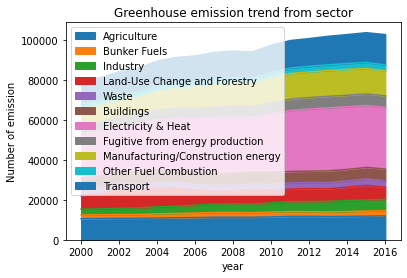

In [13]:
emisi_year.plot(kind='area')

plt.title('Greenhouse emission trend from sector')
plt.ylabel('Number of emission')
plt.xlabel('year')

plt.show()

Jumlah greenhouse emission tiap sektor selama tahun 2000-2016 serta total greenhouse emission tiap tahun

In [14]:
emisi_year_t = emisi_year.T
emisi_year_t.rename(columns={'Year':'Sector'}, inplace=True)

sum_sector = emisi_year_t.sum(axis=1)
sum_year = emisi_year_t.sum(axis=0)
print (sum_sector)
print (sum_year)

Agriculture                          192155.27
Bunker Fuels                          38090.10
Industry                              72570.61
Land-Use Change and Forestry         124359.62
Waste                                 52190.83
Buildings                             98601.70
Electricity & Heat                   470778.40
Fugitive from energy production       89732.84
Manufacturing/Construction energy    187379.50
Other Fuel Combustion                 45538.22
Transport                            224575.50
dtype: float64
Year
2000     79372.53
2001     81263.13
2002     84159.06
2003     85952.49
2004     89559.22
2005     91378.29
2006     92144.11
2007     93871.59
2008     94544.84
2009     94161.91
2010     97518.94
2011     99833.77
2012    100824.05
2013    101969.03
2014    102835.08
2015    103772.59
2016    102811.96
dtype: float64


# Modelling

In [15]:
uploaded1 = files.upload()

Saving electricity-generation.xlsx to electricity-generation.xlsx


In [17]:
dfE =  pd.ExcelFile(io.BytesIO(uploaded1['electricity-generation.xlsx']))
df_electricity = pd.read_excel(dfE,'electricity-generation (1)')
#df_electricity = pd.read_csv('electricity-generation.csv')

In [18]:
df_electricity.head()

,Country,Code,Year,Electricity Generation (TWh)
0,Afghanistan,AFG,2000,0.467
1,Afghanistan,AFG,2001,0.592
2,Afghanistan,AFG,2002,0.687
3,Afghanistan,AFG,2003,0.939
4,Afghanistan,AFG,2004,0.894


In [19]:
uploaded2=files.upload()

Saving ghg-emissions.xlsx to ghg-emissions.xlsx


In [20]:
#dfg =  pd.ExcelFile(io.BytesIO(uploaded1['ghg-emissions.xlsx']))
#df_ghg = pd.read_excel(dfg, 'ghg-emissions')
df_ghg = pd.read_excel('ghg-emissions.xlsx')

In [21]:
df_ghg.head()

,Country,Code,Year,ghg-emission
0,Afghanistan,AFG,2000,15.05
1,Afghanistan,AFG,2001,13.47
2,Afghanistan,AFG,2002,16.10
3,Afghanistan,AFG,2003,16.78
4,Afghanistan,AFG,2004,16.35


In [22]:
# Check for Nulls
print(df_electricity.isnull().any())
print("--------------------------------------")
# check for numbers
print(df_electricity.describe())
print("--------------------------------------")

Country                         False
Code                             True
Year                            False
Electricity Generation (TWh)    False
dtype: bool
--------------------------------------
              Year  Electricity Generation (TWh)
count  3155.000000                   3155.000000
mean   2007.941046                    112.567981
std       4.928501                    472.814672
min    2000.000000                      0.000000
25%    2004.000000                      0.968500
50%    2008.000000                      8.629000
75%    2012.000000                     51.666815
max    2017.000000                   6133.160000
--------------------------------------


In [23]:
df_electricity.dtypes

Country                          object
Code                             object
Year                              int64
Electricity Generation (TWh)    float64
dtype: object

In [25]:
#for further clustering we need to drop object dtypes
df_electricityd = df_electricity.drop('Country', axis=1)
df_electricityd = df_electricityd.drop('Code', axis=1)
df_electricityd.head()

,Year,Electricity Generation (TWh)
0,2000,0.467
1,2001,0.592
2,2002,0.687
3,2003,0.939
4,2004,0.894


In [26]:
# Check for Nulls
print(df_ghg.isnull().any())
print("--------------------------------------")
# check for numbers
print(df_ghg.describe())
print("--------------------------------------")

Country         False
Code            False
Year            False
ghg-emission    False
dtype: bool
--------------------------------------
              Year  ghg-emission
count  3127.000000   3127.000000
mean   2007.997442    214.338686
std       4.898456    863.990376
min    2000.000000      0.000000
25%    2004.000000      9.140000
50%    2008.000000     31.450000
75%    2012.000000     96.745000
max    2016.000000  11899.200000
--------------------------------------


In [29]:
#for further clustering we need to drop object dtypes
df_ghgd = df_ghg.drop('Country', axis=1)
df_ghgd = df_ghgd.drop('Code', axis=1)
df_ghgd

,Year,ghg-emission
0,2000,15.05
1,2001,13.47
2,2002,16.10
3,2003,16.78
4,2004,16.35
...,...,...
3122,2012,31.48
3123,2013,31.44
3124,2014,29.99
3125,2015,31.24


Clustering GHG Emission

In [30]:
#normalizing based on standard deviason
from sklearn.preprocessing import StandardScaler
#X7 = df_electricityd.values[:,0:]
X7 = df_ghgd['ghg-emission']
X7 = np.nan_to_num(X7).reshape(-1,1)
Clus_dataSet = StandardScaler().fit_transform(X7)
Clus_dataSet

array([[-0.23069766],
       [-0.23252668],
       [-0.22948218],
       ...,
       [-0.21340304],
       [-0.21195603],
       [-0.21357668]])

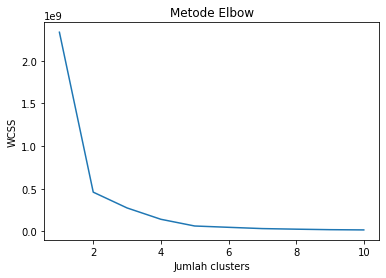

In [31]:
#K-Mean Clustering
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans7 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans7.fit(X7)
    wcss.append(kmeans7.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
clusterNum7 = 3
k_means7 = KMeans(init = "k-means++", n_clusters = clusterNum7, n_init = 15)
k_means7.fit(X7)
labels7 = k_means7.labels_
print(labels7)

[0 0 0 ... 0 0 0]


In [33]:
df_ghgd["Cluster"] = labels7
df_ghgd

,Year,ghg-emission,Cluster
0,2000,15.05,0
1,2001,13.47,0
2,2002,16.10,0
3,2003,16.78,0
4,2004,16.35,0
...,...,...,...
3122,2012,31.48,0
3123,2013,31.44,0
3124,2014,29.99,0
3125,2015,31.24,0


Clustering Electricity

In [34]:
#normalizing based on standard deviason
from sklearn.preprocessing import StandardScaler
X8 = df_electricityd.values[:,0:]
#X7 = df_ghgd['ghg-emission']
#X8 = np.nan_to_num(X8).reshape(-1,1)
Clus_dataSet1= StandardScaler().fit_transform(X8)
Clus_dataSet1

array([[-1.61150526, -0.23713044],
       [-1.40857163, -0.23686602],
       [-1.20563801, -0.23666507],
       ...,
       [ 1.22956552, -0.2175848 ],
       [ 1.43249915, -0.21825959],
       [ 1.63543278, -0.22367906]])

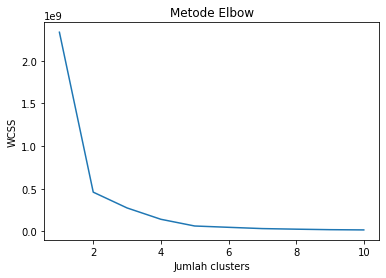

In [35]:
from sklearn.cluster import KMeans
wcss0 = []
for i in range(1, 11):
    kmeans0 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans0.fit(X8)
    wcss0.append(kmeans0.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
clusterNum0 = 3
k_means0 = KMeans(init = "k-means++", n_clusters = clusterNum0, n_init = 15)
k_means0.fit(X8)
labels0 = k_means0.labels_
print(labels0)
print(len(labels0))

[0 0 0 ... 0 0 0]
3155


In [37]:
df_electricityd["Cluster"] = labels0
df_electricityd

,Year,Electricity Generation (TWh),Cluster
0,2000,0.467,0
1,2001,0.592,0
2,2002,0.687,0
3,2003,0.939,0
4,2004,0.894,0
...,...,...,...
3150,2012,8.929,0
3151,2013,9.256,0
3152,2014,9.707,0
3153,2015,9.388,0


In [40]:
pip install pycountry

     |████████████████████████████████| 10.1MB 2.6MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746865 sha256=54dfa7a03c30efcf6b25fe8a2a9f650fe217883f5a613f7315599ca70bb51515
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [41]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 14.0MB/s 
     |████████████████████████████████| 14.8MB 319kB/s 


In [42]:
pip install mapclassify

In [44]:
# World Map Visualization

import pycountry 
import geopandas
import mapclassify

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
    
# create a column for code 
df_electricityd['Country'] = df_electricity['Country']
df_ghgd['Country'] = df_ghg['Country']

df_electricityd['CODE'] = alpha3code(df_electricity['Country'])
df_ghgd['CODE'] = alpha3code(df_ghg['Country'])

In [45]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world = world.drop(columns=['pop_est','name','gdp_md_est'])

# then merge with our data 
merge_electricity=pd.merge(world,df_electricityd,on='CODE')
merge_ghg=pd.merge(world,df_ghgd,on='CODE')

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, 'World Electricity Usage')

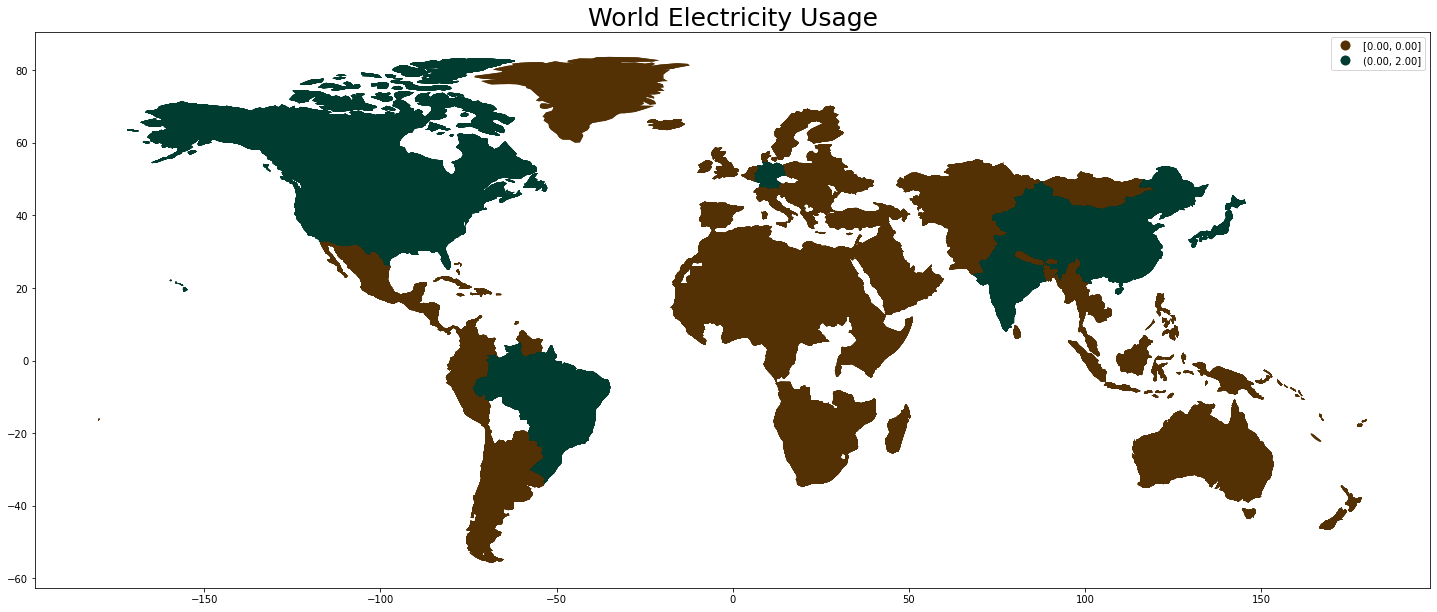

In [46]:
merge_electricity.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('World Electricity Usage',fontsize=25)

/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:236: UserWarning:


/usr/local/lib/python3.6/dist-packages/mapclassify/classifiers.py:238: UserWarning:




Text(0.5, 1.0, 'WOrld GHG Emission')

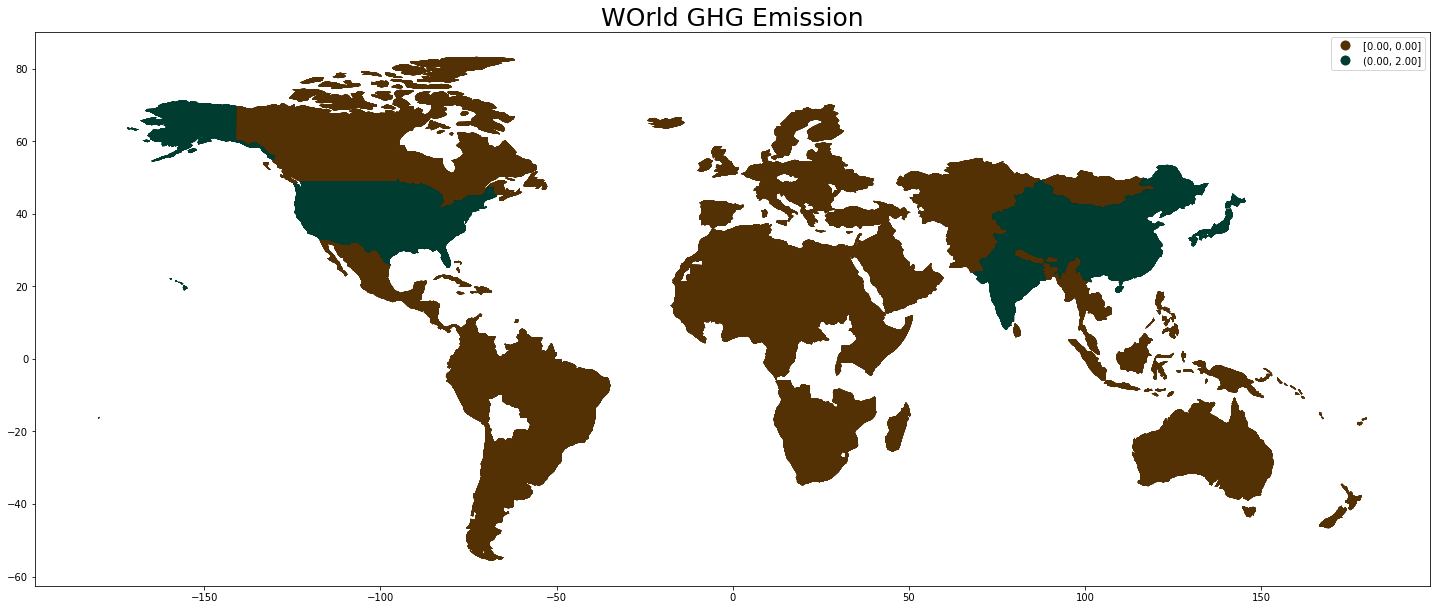

In [47]:
merge_ghg.plot(column='Cluster', scheme="quantiles",
           figsize=(25, 20),
           legend=True ,cmap='BrBG')

plt.title('WOrld GHG Emission',fontsize=25)

# Evaluating

In [38]:
#Evaluation

from sklearn.metrics import silhouette_samples, silhouette_score

# Get silhouette samples
silhouette_vals_electricity = silhouette_samples(Clus_dataSet1, labels0)
silhouette_vals_ghg = silhouette_samples(Clus_dataSet, labels7)

# Get the average silhouette score and plot it
avg_score_electricity = np.mean(silhouette_vals_electricity)
avg_score_ghg = np.mean(silhouette_vals_ghg)

print("Rerata Silhouette Koefisien World Electricty Data: {:5.5f}".format(avg_score_electricity))
print("Rerata Silhouette Koefisien Greenhouse gas Data: {:5.5f}".format(avg_score_ghg))

Rerata Silhouette Koefisien World Electricty Data: 0.44092
Rerata Silhouette Koefisien Greenhouse gas Data: 0.90808
